# TravelTide 4.0

In this notebook we loaded all tables from `.csv` files that we saved on the version 3.0 of this project. 

We already started with the segmentation of the users. On the last notebook (version 3.0) we already segmenteded the users unsing a *bargain index* and now we are going to focus on other indexes, such: \
$\rightarrow$ **Loyalty Seeker** \
$\rightarrow$ **Adventure Explorer** \
$\rightarrow$ **Family Travelers** \
$\rightarrow$ **Comfort Seeker** \
$\rightarrow$ <Routine Traveler>




$\rightarrow$ See Notion board for other tasks.

## Imports

In [54]:
import pandas as pd
from datetime import datetime
from collections import defaultdict
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Data Upload

In [3]:
df_sessions = pd.read_csv('df_sessions_2.csv')

In [4]:
df_flights = pd.read_csv('df_flights_2.csv')

In [5]:
df_hotels = pd.read_csv('df_hotels.csv')

In [157]:
df_users = pd.read_csv('users_features_2.csv')

In [165]:
df_users

,user_id,birthdate,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,home_airport_lon,sign_up_date,age,age_bucket,session_count,booking_count,cancellations,avg_session_duration_min,booking_conversion_rate,cancellation_rate,explorer_bucket,flight_discount_booking_rate,hotel_discount_booking_rate,average_flight_discount,average_hotel_discount,flight_discount_bookings,hotel_discount_bookings,discounted_bookings,discount_booking_rate,discount_sensitivity_bucket,avg_days_between_sessions,session_day_type,days_since_last_booking,recency_bucket,flight_booking_count,total_flight_spent,avg_seats_booked,scaled_ADS_per_km,bargain_index,bargain_perk_segment,hotels_booking_count,total_hotel_spent,avg_nights_booked,n_destinations,n_destinations_scaled,seats_scaled,adventure_index,adventure_perk_segment,family_index,family_perk_segment,comfort_index,comfort_perk_segment,loyalty_index,loyalty_perk_segment,booking_session_count
0,440,1967-01-26,M,False,False,Usa,Long Beach,LGB,33.818,-118.151,2021-04-17,58,55-64,3,1,0,2.37,33.33,0.0,Casual Explorer,0.0,0.00,NaN,NaN,0.0,0.00,0.00,0.00,Non-sensitive,82.00,Weekday User,40.0,31–90 days,1.0,394.97,1.0,0.029058,0.001947,False,1.0,410.0,18.0,1.0,0.125,0.090909,1.034091,False,NaN,NaN,0.337266,False,0.525418,False,1.0
1,564,1986-07-06,F,False,False,Usa,New York,LGA,40.777,-73.872,2021-04-19,38,35-44,3,1,0,1.17,33.33,0.0,Casual Explorer,0.0,0.00,0.1,NaN,0.0,0.00,0.00,0.00,Non-sensitive,30.50,Weekday User,181.0,90+ days,1.0,375.58,1.0,0.006077,0.000000,False,NaN,NaN,NaN,1.0,0.125,0.090909,1.034091,False,NaN,NaN,NaN,False,1.032807,False,1.0
2,1269,1991-08-21,F,False,False,Canada,Montreal,YMX,45.680,-74.039,2021-05-11,33,25-34,3,2,0,1.88,66.67,0.0,Casual Explorer,0.0,0.67,NaN,0.1,0.0,1.34,1.34,0.67,Highly sensitive,91.50,Weekday User,15.0,15–30 days,NaN,NaN,NaN,NaN,NaN,NaN,1.0,159.0,2.0,2.0,0.250,NaN,NaN,False,NaN,NaN,0.065311,False,NaN,False,2.0
3,1279,1966-11-15,F,True,True,Usa,San Antonio,SAT,29.534,-98.470,2021-05-11,58,55-64,3,1,0,1.79,33.33,0.0,Casual Explorer,0.0,0.00,NaN,NaN,0.0,0.00,0.00,0.00,Non-sensitive,67.50,Weekday User,25.0,15–30 days,NaN,NaN,NaN,NaN,NaN,NaN,1.0,220.0,1.0,1.0,0.125,NaN,NaN,False,NaN,False,0.068731,False,NaN,False,1.0
4,4145,1965-10-12,M,True,True,Canada,Quebec,YQB,46.788,-71.398,2021-06-02,59,55-64,4,1,0,1.27,25.00,0.0,Casual Explorer,0.0,0.00,0.2,NaN,0.0,0.00,0.00,0.00,Non-sensitive,26.67,Balanced,163.0,90+ days,NaN,NaN,NaN,NaN,NaN,NaN,1.0,279.0,1.0,1.0,0.125,NaN,NaN,False,NaN,False,0.084439,False,NaN,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611211,687002,1967-09-14,F,False,False,Usa,Chicago,MDW,41.786,-87.752,2023-03-23,57,55-64,4,0,0,1.70,0.00,0.0,Unengaded,0.0,0.00,0.1,NaN,0.0,0.00,0.00,NaN,Not Responsive to Discounts,1.33,Weekday User,NaN,No Booking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,NaN,NaN,False,NaN,NaN,NaN,False,NaN,False,0.0
611212,687342,2000-12-14,M,False,False,Canada,Calgary,YYC,51.114,-114.020,2023-03-23,24,18-24,3,0,0,3.83,0.00,0.0,Unengaded,0.0,0.00,NaN,NaN,0.0,0.00,0.00,NaN,No Booking & No Discount Exposure,1.00,Weekday User,NaN,No Booking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,NaN,NaN,False,NaN,NaN,NaN,False,NaN,False,0.0
611213,689837,2004-12-06,M,False,False,Usa,Atlanta,ATL,33.640,-84.427,2023-03-24,20,18-24,3,0,0,0.38,0.00,0.0,Unengaded,0.0,0.00,NaN,NaN,0.0,0.00,0.00,NaN,No Booking & No Discount Exposure,0.00,Weekend User,NaN,No Booking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,NaN,NaN,False,NaN,NaN,NaN,False,NaN,False,0.0
611214,690058,1994-07-19,F,False,True,Usa,Colorado Springs,COS,38.806,-104.700,2023-03-24,30,25-34,3,0,0,0.95,0.00,0.0,Unengaded,0.0,0.00,NaN,NaN,0.0,0.00,0.00,NaN,No Booking & No Discount Exposure,1.50,Weekday User,NaN,No Booking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,NaN,NaN,False,NaN,NaN,N

In [163]:
df_flights["base_fare_usd"].isna().sum()

np.int64(0)

In [8]:
df_sessions = pd.read_csv('df_sessions.csv')

In [9]:
df_sessions

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,hotel_booked,page_clicks,cancellation,booking_made,session_duration_min
0,73956-cfd4601ebfea4c198cd738d43cdc848f,73956,NaN,2023-03-29 12:26:00,2023-03-29 12:27:07,True,False,0.10,NaN,False,False,9,False,0,1.12
1,74042-363a73533e4b48138d66938ad17081c6,74042,74042-c0ccd5ba2a1b4d698e88fa5ce493afcb,2023-03-29 21:17:00,2023-03-29 21:19:24,False,False,NaN,NaN,True,True,19,False,1,2.40
2,75154-36e1e3698f354ba8b4fca0329fda968b,75154,75154-b07e18b3aa32428c921e414f13a173c9,2023-03-29 14:11:00,2023-03-29 14:14:39,True,False,0.30,NaN,False,True,30,False,1,3.65
3,76778-aa70d12e56a34a5785fc5779272f5e52,76778,NaN,2023-03-29 14:36:00,2023-03-29 14:37:08,True,False,0.10,NaN,False,False,9,False,0,1.13
4,78511-d44b047bae774d788b3ff92b67af466d,78511,NaN,2023-03-29 22:04:00,2023-03-29 22:05:34,False,False,NaN,NaN,False,False,13,False,0,1.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515297,70148-1c2b516de152446c9df9b8cae357ae96,70148,70148-4595801f5f004fd9910d1168d0cd21f9,2023-03-29 20:31:00,2023-03-29 20:34:30,False,False,NaN,NaN,True,True,28,False,1,3.50
2515298,71006-cc40bd8e9c9d48bdb2a59e82e8aa7673,71006,NaN,2023-03-29 15:34:00,2023-03-29 15:34:32,True,False,0.30,NaN,False,False,4,False,0,0.53
2515299,71786-0bfa66e406b046e0a9e42c9b744f4465,71786,NaN,2023-03-29 20:54:00,2023-03-29 20:54:08,True,False,0.15,NaN,False,False,1,False,0,0.13
2515300,72507-694cfccd26534da09c5ed726c3c993dd,72507,72507-5f4ffde2e82d4bcd98027426372ae568,2023-03-29 01:42:00,2023-03-29 01:44:44,False,False,NaN,NaN,True,True,22,False,1,2.73


## Loyalty Seeker

The loyalty_index is a composite metric designed to identify customers who demonstrate high loyalty through frequent and consistent engagement with the platform. These users are ideal candidates for perks related to loyalty rewards, such as tier upgrades or exclusive member benefits.

The index is based on three behavioral signals: \
	1.	flight_booking_count – Total number of flights booked \
→ Frequent bookings suggest strong platform engagement. \
	2.	booking_conversion_rate – Ratio of bookings to total sessions \
→ A high conversion rate indicates purpose-driven usage and efficiency. \
	3.	avg_days_between_sessions – Average time gap between sessions \
→ Fewer days between sessions suggest regular, loyal behavior (this value is inverted in the index).

All three metrics are normalized using MinMaxScaler to bring them onto a common scale (0 to 1). The final index is computed as:

`loyalty_index = scaled(flight_booking_count) + scaled(booking_conversion_rate) + (1 - scaled(avg_days_between_sessions))`

This formulation ensures that higher values consistently represent stronger loyalty.

Finally, users above the 90th percentile in this index are flagged as the loyalty_perk_segment, representing the top 10% most loyal users.

In [ ]:
df_users_loyalty = df_users.copy()

In [ ]:
scaler = MinMaxScaler()

df_users_loyalty[["loyalty_booking_scaled", "loyalty_conversion_scaled", "loyalty_frequency_scaled"]] = scaler.fit_transform(
    df_users_loyalty[[
        "flight_booking_count",
        "booking_conversion_rate",
        "avg_days_between_sessions"
    ]]
)

In [11]:
df_users_loyalty["loyalty_index"] = (
    df_users_loyalty["loyalty_booking_scaled"] +
    df_users_loyalty["loyalty_conversion_scaled"] +
    (1 - df_users_loyalty["loyalty_frequency_scaled"])
)

In [13]:
cutoff_loyalty = df_users_loyalty["loyalty_index"].quantile(0.90)
df_users_loyalty["loyalty_perk_segment"] = df_users_loyalty["loyalty_index"] >= cutoff_loyalty

In [40]:
df_users = df_users.merge(df_users_loyalty[["user_id", "loyalty_index", "loyalty_perk_segment"]], on="user_id", how="left")

In [ ]:
df_users = df_users.merge(
    df_users_comfort[["user_id", "comfort_index", "comfort_perk_segment"]],
    on="user_id", how="left" 
)

In [16]:
df_users_loyalty["loyalty_perk_segment"].value_counts()

loyalty_perk_segment
False    586413
True      24803
Name: count, dtype: int64

In [ ]:
df_

## Adventure Explorers

The adventure_index is a composite metric designed to identify users who demonstrate an exploratory travel pattern. These users frequently visit new destinations, often travel solo, and are ideal candidates for perks that support flexible or spontaneous travel, such as free cancellation or waived baggage fees.

This index combines two key behavioral signals: \
	1.	**n_destinations** – Number of unique destinations a user has flown to \
→ A higher count reflects a strong preference for varied travel experiences. \
	2.	**avg_seats_booked** – Average number of seats per flight\
→ Fewer seats suggest solo travel or independent exploration. This value is inverted in the index to reflect higher adventurousness with fewer seats.

All values are normalized using MinMaxScaler, and the final index is calculated as: \
`adventure_index = scaled(n_destinations) + (1 - scaled(avg_seats_booked))`

This ensures that users who fly to many different places and typically book only one seat receive the highest scores.

The top 10% of users (based on the 90th percentile) are labeled as belonging to the adventure_perk_segment.

In [18]:
n_destinations = df_flights.groupby("user_id")["destination"].nunique().reset_index()
n_destinations.rename(columns={"destination": "n_destinations"}, inplace=True)

In [19]:
df_users = df_users.merge(n_destinations, on="user_id", how="left")
df_users["n_destinations"] = df_users["n_destinations"].fillna(0)

In [20]:
scaler = MinMaxScaler()

df_users[["n_destinations_scaled", "seats_scaled"]] = scaler.fit_transform(
    df_users[[
        "n_destinations",
        "avg_seats_booked"
    ]]
)

In [21]:
# Fewer seats booked → more adventurous (inverted)
df_users["adventure_index"] = (
    df_users["n_destinations_scaled"] +
    (1 - df_users["seats_scaled"])
)

In [22]:
cutoff_adventure = df_users["adventure_index"].quantile(0.90)
df_users["adventure_perk_segment"] = df_users["adventure_index"] >= cutoff_adventure

In [23]:
df_users["adventure_perk_segment"].value_counts()

adventure_perk_segment
False    579693
True      31523
Name: count, dtype: int64

## Family Travelers

dex is a composite metric created to identify loyal family travelers – users who frequently book trips for multiple people and stay for several nights. These users are ideal candidates for perks that support family needs, such as free checked bags, larger hotel rooms, or early boarding.

To increase precision, the segment is restricted to users who: \
	•	Are married (`married == True`) \
	•	Have children (`has_children == True`)

Among those, the index is calculated using:\
	1.	**avg_seats_booked** – Average number of seats per flight \
→ More seats indicate family/group travel. \
	2.	**avg_nights_booked** – Average number of nights per hotel booking \
→ Families often travel for longer periods. \

Both metrics are normalized using MinMaxScaler, and the index is calculated as: \
`family_index = scaled(avg_seats_booked) + scaled(avg_nights_booked)`

The top 10% of married users with children, based on this index, are flagged as the family_perk_segment and are strong candidates for family-oriented perks.

In [24]:
# Step 1: Filter for married users with children
df_families = df_users[
    (df_users["has_children"] == True) & 
    (df_users["married"] == True)
].copy()

In [25]:
df_families[["seats_scaled", "nights_scaled"]] = scaler.fit_transform(
    df_families[["avg_seats_booked", "avg_nights_booked"]]
)

In [26]:
df_families["family_index"] = (
    df_families["seats_scaled"] + df_families["nights_scaled"]
)

In [27]:
cutoff_family = df_families["family_index"].quantile(0.90)
df_families["family_perk_segment"] = df_families["family_index"] >= cutoff_family

In [28]:
df_users = df_users.merge(
    df_families[["user_id", "family_index", "family_perk_segment"]],
    on="user_id", how="left"
)

In [29]:
df_families["family_perk_segment"].value_counts()

family_perk_segment
False    90987
True      3614
Name: count, dtype: int64

## Comfort Seekers

The comfort_index is a composite metric designed to identify users who consistently prioritize comfort and extended stays during their travel. These users are strong candidates for perks related to hotel experiences, such as free room upgrades, complimentary hotel nights, or on-site perks like meals or spa access.

The index is calculated using three key indicators: \
	1.	**hotels_booking_count** – Total number of hotel bookings \
→ Indicates how often the user books accommodation.\
	2.	**avg_nights_booked** – Average number of nights per booking\
→ Reflects preference for longer, more comfortable stays.\
	3.	**total_hotel_spent** – Total spend on hotels\
→ Shows willingness to pay for comfort and quality.

Users in the top 10% of this index are labeled as part of the comfort_perk_segment, making them eligible for high-value hotel-related perks.

In [30]:
df_users_comfort = df_users.copy()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [31]:
# Scale selected features
scaler = MinMaxScaler()
df_users_comfort[["hotel_count_scaled", "nights_scaled", "spend_scaled"]] = scaler.fit_transform(
    df_users_comfort[[
        "hotels_booking_count",
        "avg_nights_booked",
        "total_hotel_spent"
    ]]
)

In [32]:
# Compute comfort_index
df_users_comfort["comfort_index"] = (
    df_users_comfort["hotel_count_scaled"] +
    df_users_comfort["nights_scaled"] +
    df_users_comfort["spend_scaled"]
)

In [33]:
# Define top segment (90th percentile)
cutoff_comfort = df_users_comfort["comfort_index"].quantile(0.90)
df_users_comfort["comfort_perk_segment"] = df_users_comfort["comfort_index"] >= cutoff_comfort

In [35]:
# Merge back into full user table
df_users = df_users.merge(
    df_users_comfort[["user_id", "comfort_index", "comfort_perk_segment"]],
    on="user_id", how="left" 
)

In [37]:
df_users_comfort["comfort_perk_segment"].value_counts()

comfort_perk_segment
False    563169
True      48047
Name: count, dtype: int64

## Clustering

In [51]:
features = [
    "flight_booking_count",
    "hotels_booking_count",
    "total_flight_spent",
    "total_hotel_spent",
    "booking_conversion_rate",
    "avg_days_between_sessions",
    "cancellation_rate",
    "bargain_index",
    "loyalty_index",
    "adventure_index",
    "comfort_index",
    "family_index"
]

In [55]:
df_cluster = df_users.dropna(subset=features).copy()

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_cluster[features])

In [56]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster["cluster"] = kmeans.fit_predict(scaled)

In [57]:
df_cluster

,user_id,birthdate,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,home_airport_lon,sign_up_date,age,age_bucket,session_count,booking_count,cancellations,avg_session_duration_min,booking_conversion_rate,cancellation_rate,explorer_bucket,flight_discount_booking_rate,hotel_discount_booking_rate,average_flight_discount,average_hotel_discount,flight_discount_bookings,hotel_discount_bookings,discounted_bookings,discount_booking_rate,discount_sensitivity_bucket,avg_days_between_sessions,session_day_type,days_since_last_booking,recency_bucket,flight_booking_count,total_flight_spent,avg_seats_booked,scaled_ADS_per_km,bargain_index,bargain_perk_segment,hotels_booking_count,total_hotel_spent,avg_nights_booked,n_destinations,n_destinations_scaled,seats_scaled,adventure_index,adventure_perk_segment,family_index,family_perk_segment,comfort_index,comfort_perk_segment,loyalty_index,loyalty_perk_segment,booking_session_count,cluster
87,54436,1975-05-13,M,True,True,Canada,Toronto,YTZ,43.627,-79.396,2021-10-28,49,45-54,5,2,0,2.10,40.00,0.00,Unengaded,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,Non-sensitive,36.25,Weekday User,52.0,31–90 days,2.0,399.31,1.00,0.055770,0.000000,False,2.0,692.0,6.0,2.0,0.250,0.090909,1.159091,False,0.176623,False,0.383499,False,1.185714,False,2.0,0
132,76103,1977-01-22,F,True,True,Canada,Montreal,YUL,45.468,-73.741,2022-01-02,48,45-54,3,3,1,45.69,100.00,33.33,Casual Explorer,0.33,0.33,NaN,NaN,0.99,0.99,1.98,0.66,Highly sensitive,31.50,Weekday User,120.0,90+ days,3.0,7909.61,1.67,0.532623,0.026365,True,2.0,236.0,2.0,2.0,0.250,0.151818,1.098182,False,0.180390,False,0.210811,False,1.975369,True,3.0,2
159,84968,1988-06-24,F,True,True,Canada,Winnipeg,YWG,49.910,-97.234,2022-01-21,36,35-44,4,1,0,2.47,25.00,0.00,Casual Explorer,0.25,0.00,0.10,NaN,0.25,0.00,0.25,0.25,Mildly sensitive,45.33,Weekday User,51.0,31–90 days,1.0,331.86,1.00,0.014567,0.000546,False,1.0,143.0,6.0,1.0,0.125,0.090909,1.034091,False,0.176623,False,0.112333,False,0.803399,False,1.0,1
168,88065,1964-04-02,F,True,True,Usa,New Orleans,NBG,29.825,-90.035,2022-01-27,61,55-64,5,2,0,1.97,40.00,0.00,Unengaded,0.20,0.00,0.12,NaN,0.40,0.00,0.40,0.20,Mildly sensitive,22.75,Weekday User,181.0,90+ days,1.0,491.61,1.00,0.026358,0.000329,False,2.0,199.0,5.0,1.0,0.125,0.090909,1.034091,False,0.162338,False,0.239422,False,1.175862,False,2.0,1
212,100433,1983-02-26,M,True,True,Canada,Toronto,YZD,43.742,-79.466,2022-02-15,42,35-44,3,3,0,3.54,100.00,0.00,Casual Explorer,0.33,0.00,0.10,NaN,0.99,0.00,0.99,0.33,Mildly sensitive,53.50,Weekday User,70.0,31–90 days,3.0,1033.81,1.00,0.026616,0.000000,False,2.0,443.0,8.0,3.0,0.375,0.090909,1.284091,True,0.205195,False,0.342846,False,1.758621,False,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611126,661374,1973-10-22,M,True,True,Usa,Cincinnati,CVG,39.046,-84.662,2023-03-14,51,45-54,3,1,0,1.66,33.33,0.00,Casual Explorer,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,Non-sensitive,6.50,Weekday User,122.0,90+ days,1.0,579.64,1.00,0.007749,0.000097,False,1.0,163.0,1.0,1.0,0.125,0.090909,1.034091,False,0.105195,False,0.053555,False,1.269261,False,1.0,1
611131,662263,1961-06-06,M,True,True,Usa,Las Vegas,LSV,36.236,-115.034,2023-03-14,63,55-64,3,1,0,1.42,33.33,0.00,Casual Explorer,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,Non-sensitive,7.00,Weekday User,122.0,90+ days,1.0,3228.99,5.00,0.075218,0.000000,False,1.0,148.0,10.0,1.0,0.125,0.454545,0.670455,False,0.597403,True,0.164946,False,1.264334,False,1.0,1
611140,663921,1984-01-01,F,True,True,Usa,Houston,EFD,29.607,-95.159,2023-03-15,41,35-44,4,1,0,1.53,25.00,0.00,Casual Explorer,0.25,0.00,0.08,0.2,0.25,0.00,0.25,0.25,Mildly sensitive,3.00,Weekday User,125.0,90+ days,1.0,201.42,1.00,0.033792,0.000000,False,1.0,152.0,9.0,1.0,0.125,0.090909,1.034091,False,0.219481,False,0.153191,False,1.220443,F

In [58]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)
df_cluster["pca_1"] = pca_result[:, 0]
df_cluster["pca_2"] = pca_result[:, 1]

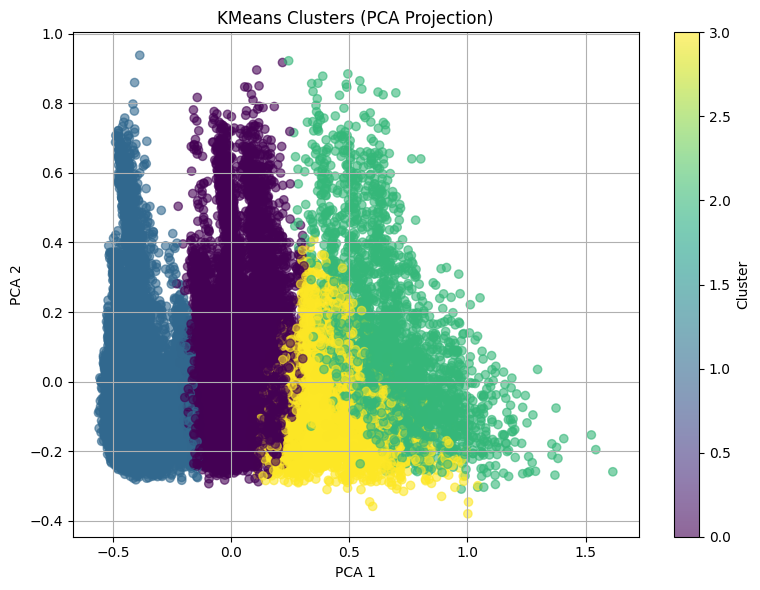

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(df_cluster["pca_1"], df_cluster["pca_2"], c=df_cluster["cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clusters (PCA Projection)")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
# Choose the same features you used for clustering
features_to_summarize = features + ["cluster"]  # reuse your earlier 'features' list

# Group by cluster and calculate the mean of each feature
cluster_profiles = df_cluster[features_to_summarize].groupby("cluster").mean().round(2)

# Sort features within each cluster to see standout behaviors (optional)
cluster_profiles = cluster_profiles.T  # transpose to view features vertically

In [61]:
cluster_profiles

cluster,0,1,2,3
flight_booking_count,1.82,1.07,3.17,2.85
hotels_booking_count,1.84,1.09,3.00,3.00
total_flight_spent,1729.22,673.85,3820.34,1693.65
total_hotel_spent,316.31,186.67,538.70,557.16
booking_conversion_rate,54.51,28.37,94.15,64.20
avg_days_between_sessions,29.07,25.96,34.95,25.21
cancellation_rate,3.10,0.28,7.65,1.77
bargain_index,0.01,0.00,0.01,0.00
loyalty_index,1.38,1.04,1.91,1.66
adventure_index,1.08,1.02,1.19,1.22


## Decision Tree 

### Numpy

In [110]:
df_perks = pd.DataFrame(df_users[["user_id", "loyalty_index", "bargain_index", "adventure_index", "comfort_index", "family_index"]]).copy()

In [111]:
conditions = [
    df_users["loyalty_perk_segment"] == True,
    df_users["bargain_perk_segment"] == True,
    df_users["adventure_perk_segment"] == True,
    df_users["comfort_perk_segment"] == True,
    df_users["family_perk_segment"] == True
]

choices = [
    "Loyalty Rewards",
    "Exclusive Discounts",
    "Flexible Rebooking",
    "Free Hotel Night",
    "Family Baggage Perk"
]

In [112]:
df_perks["assigned_perk"] = np.select(conditions, choices, default="General Marketing Pool")

In [113]:
df_perks = df_perks.loc[df_perks['assigned_perk'] != "General Marketing Pool"]

In [114]:
df_perks['assigned_perk'].value_counts()

assigned_perk
Free Hotel Night       31211
Loyalty Rewards        24803
Exclusive Discounts    20795
Flexible Rebooking     14483
Family Baggage Perk     2209
Name: count, dtype: int64

In [119]:
df_perks[["loyalty_index", "bargain_index", "adventure_index", "comfort_index", "family_index"]] = df_perks[["loyalty_index", "bargain_index", "adventure_index", "comfort_index", "family_index"]].fillna(0)

In [120]:
df_perks

,user_id,loyalty_index,bargain_index,adventure_index,comfort_index,family_index,assigned_perk
6,5338,1.077142,0.021528,0.761364,0.058389,0.000000,Exclusive Discounts
18,16897,0.692906,0.008038,1.034091,0.032256,0.000000,Exclusive Discounts
24,19821,1.950739,0.013164,1.284091,0.212675,0.000000,Loyalty Rewards
50,34085,0.000000,0.000000,0.000000,0.584717,0.000000,Free Hotel Night
79,50316,1.980296,0.000000,1.129091,0.425309,0.000000,Loyalty Rewards
...,...,...,...,...,...,...,...
611170,669101,1.318522,0.024091,1.034091,0.191755,0.000000,Exclusive Discounts
611172,669254,1.323448,0.021979,1.034091,0.039178,0.000000,Exclusive Discounts
611182,672012,1.293891,0.000000,0.579545,0.281314,0.788312,Family Baggage Perk
611204,684446,1.323448,0.007691,1.034091,0.000000,0.000000,Exclusive Discounts


### DecisionTreeClassifier

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [121]:
X = df_perks[["loyalty_index", "bargain_index", "adventure_index", "comfort_index", "family_index"]]
y = df_perks["assigned_perk"]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [123]:
model = DecisionTreeClassifier(max_depth = 4, random_state=42)

In [124]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [139]:
model.predict(X_test)

array(['Loyalty Rewards', 'Exclusive Discounts', 'Flexible Rebooking',
       ..., 'Loyalty Rewards', 'Loyalty Rewards', 'Exclusive Discounts'],
      shape=(23376,), dtype=object)

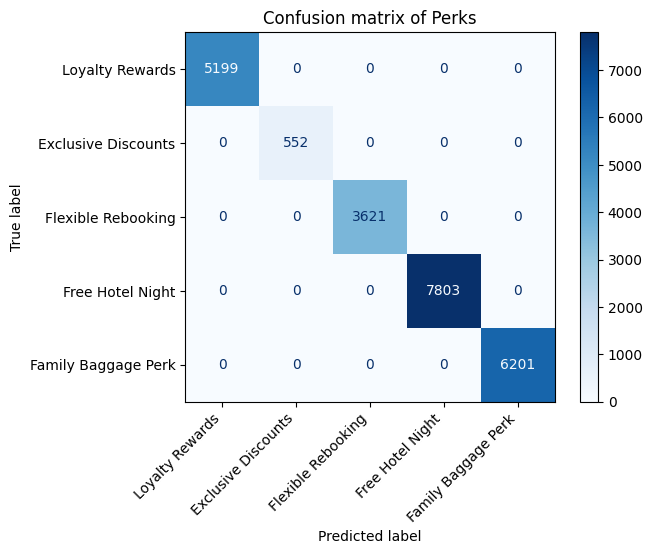

In [149]:
title = "Confusion matrix of Perks"


disp = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    display_labels=choices,
    cmap=plt.cm.Blues
)
plt.xticks(rotation=45, ha='right')
plt.title(title)
#print(disp.confusion_matrix)

plt.show()

## Save .CSV 

In [153]:
#df_sessions.to_csv('df_sessions_2.csv', index=False)
#df_flights.to_csv('df_flights_2.csv', index=False)
#df_hotels.to_csv('df_hotels.csv', index=False)
df_users.to_csv('users_features_2.csv', index=False)
df_perks.to_csv('df_perks.csv', index=False)
#sessions_features.to_csv('sessions_features_2.csv', index=False)
#flights_features.to_csv('flights_features_2.csv', index=False)
#hotel_agg.to_csv('hotels_features.csv', index=False)
#users_features.to_csv('users_features.csv', index=False)

In [174]:
df_perks.columns

Index(['user_id', 'loyalty_index', 'bargain_index', 'adventure_index',
       'comfort_index', 'family_index', 'assigned_perk'],
      dtype='object')

In [176]:
df_users.loc[df_users["adventure_perk_segment"]==True]

,user_id,birthdate,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,home_airport_lon,sign_up_date,age,age_bucket,session_count,booking_count,cancellations,avg_session_duration_min,booking_conversion_rate,cancellation_rate,explorer_bucket,flight_discount_booking_rate,hotel_discount_booking_rate,average_flight_discount,average_hotel_discount,flight_discount_bookings,hotel_discount_bookings,discounted_bookings,discount_booking_rate,discount_sensitivity_bucket,avg_days_between_sessions,session_day_type,days_since_last_booking,recency_bucket,flight_booking_count,total_flight_spent,avg_seats_booked,scaled_ADS_per_km,bargain_index,bargain_perk_segment,hotels_booking_count,total_hotel_spent,avg_nights_booked,n_destinations,n_destinations_scaled,seats_scaled,adventure_index,adventure_perk_segment,family_index,family_perk_segment,comfort_index,comfort_perk_segment,loyalty_index,loyalty_perk_segment,booking_session_count
24,19821,1979-07-08,F,False,False,Usa,Washington,IAD,38.944,-77.456,2021-07-14,45,45-54,3,3,0,2.71,100.00,0.0,Casual Explorer,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,Non-sensitive,34.00,Weekday User,119.0,90+ days,3.0,719.73,1.0,0.265948,0.013164,True,2.0,243.0,2.00,3.0,0.375,0.090909,1.284091,True,NaN,NaN,0.212675,False,1.950739,True,3.0
103,60922,1976-07-23,F,False,False,Usa,New York,JFK,40.640,-73.779,2021-11-19,48,45-54,3,3,0,2.79,100.00,0.0,Casual Explorer,0.00,0.33,NaN,0.2,0.00,0.99,0.99,0.33,Mildly sensitive,36.50,Weekday User,119.0,90+ days,3.0,883.31,1.0,0.022488,0.000000,False,3.0,662.0,1.67,3.0,0.375,0.090909,1.284091,True,NaN,NaN,0.444999,False,1.926108,True,3.0
128,74042,1978-04-06,F,False,False,Canada,Montreal,YUL,45.468,-73.741,2021-12-28,47,45-54,3,3,0,2.65,100.00,0.0,Casual Explorer,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,Non-sensitive,44.00,Weekday User,32.0,31–90 days,3.0,396.87,1.0,0.006286,0.000000,False,3.0,696.0,6.67,3.0,0.375,0.090909,1.284091,True,NaN,NaN,0.518154,True,1.852217,True,3.0
142,79965,1974-01-13,F,False,False,Usa,New York,LGA,40.777,-73.872,2022-01-11,51,45-54,7,3,0,2.59,42.86,0.0,Engaged Explorer,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,Non-sensitive,24.17,Weekday User,96.0,90+ days,3.0,829.75,1.0,0.116005,0.000000,False,2.0,427.0,1.50,3.0,0.375,0.090909,1.284091,True,NaN,NaN,0.255253,False,1.476186,False,3.0
212,100433,1983-02-26,M,True,True,Canada,Toronto,YZD,43.742,-79.466,2022-02-15,42,35-44,3,3,0,3.54,100.00,0.0,Casual Explorer,0.33,0.00,0.1,NaN,0.99,0.00,0.99,0.33,Mildly sensitive,53.50,Weekday User,70.0,31–90 days,3.0,1033.81,1.0,0.026616,0.000000,False,2.0,443.0,8.00,3.0,0.375,0.090909,1.284091,True,0.205195,False,0.342846,False,1.758621,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609942,601808,1982-09-25,M,False,False,Usa,San Jose,SJC,37.362,-121.929,2023-02-18,42,35-44,4,3,0,3.91,75.00,0.0,Casual Explorer,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,Non-sensitive,11.33,Balanced,126.0,90+ days,3.0,1259.71,1.0,0.033524,0.000553,False,3.0,328.0,2.00,3.0,0.375,0.090909,1.284091,True,NaN,NaN,0.360306,False,1.924089,True,3.0
610069,154353,1990-05-06,F,False,False,Usa,New York,JFK,40.640,-73.779,2022-04-19,35,35-44,3,3,0,3.49,100.00,0.0,Casual Explorer,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,Non-sensitive,16.00,Weekday User,124.0,90+ days,3.0,831.48,1.0,0.306308,0.000000,False,2.0,193.0,3.50,3.0,0.375,0.090909,1.284091,True,NaN,NaN,0.218594,False,2.128079,True,3.0
610310,605195,1980-02-28,M,False,False,Canada,Toronto,YZD,43.742,-79.466,2023-02-19,45,45-54,3,3,0,3.97,100.00,0.0,Casual Explorer,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,Non-sensitive,18.00,Weekday User,123.0,90+ days,3.0,747.48,1.0,0.070037,0.001191,False,2.0,251.0,2.50,3.0,0.375,0.090909,1.284091,True,NaN,NaN,0.221215,False,2.108374,True,3.0
610357,606748,1981-05-28,M,False,False,Canada,Montreal,YHU,45.517,-73.417,2023-02

In [182]:
df_perks

,user_id,loyalty_index,bargain_index,adventure_index,comfort_index,family_index,assigned_perk
6,5338,1.077142,0.021528,0.761364,0.058389,0.000000,Exclusive Discounts
18,16897,0.692906,0.008038,1.034091,0.032256,0.000000,Exclusive Discounts
24,19821,1.950739,0.013164,1.284091,0.212675,0.000000,Loyalty Rewards
50,34085,0.000000,0.000000,0.000000,0.584717,0.000000,Free Hotel Night
79,50316,1.980296,0.000000,1.129091,0.425309,0.000000,Loyalty Rewards
...,...,...,...,...,...,...,...
611170,669101,1.318522,0.024091,1.034091,0.191755,0.000000,Exclusive Discounts
611172,669254,1.323448,0.021979,1.034091,0.039178,0.000000,Exclusive Discounts
611182,672012,1.293891,0.000000,0.579545,0.281314,0.788312,Family Baggage Perk
611204,684446,1.323448,0.007691,1.034091,0.000000,0.000000,Exclusive Discounts
